<a href="https://colab.research.google.com/github/mverschoor-phd/Modeling/blob/main/Python_LogReg_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Model Building

* Author: 
* Date created: 
* Project: 
* Study: 
* Related files:

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Read uploaded excel data file
df = pd.read_excel(['[file path'])

In [ ]:
#Look at tope 5 rows
df.head()

In [ ]:
#Divide into features and target dataframes
X = df.drop(['[variables not included in model]'],axis=1)
Y = df['[var-y]']

In [ ]:
#Split X and Y into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=42) #Bonus points if you get the random state reference

In [ ]:
#instantiate the model
logreg = LogisticRegression()

#fit model with data
logreg.fit(x_train,y_train)

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
#import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

In [ ]:
#Plot confusion matrix
predictions = logreg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

# Use score method to get accuracy of model
score = logreg.score(x_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'GnBu')
plt.ylabel('[var-y]')
plt.xlabel('[var-x]')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

## Classification Report

Precision is the ratio of true positives/(true positives + false positives) - ability of model to label as sample as positive if negative.

Recall is the ratio of true positives/(true positives + false negatives) - ability of model to find all positive samples

F1-score is weighted harmonic mean of precision and recall - best at 1, worst at 0. Weighs the recall more than precision by beta factor. I used beta of 1 to weigh recall and precision equally.

Support is the number of occurrences of each class in y_test dataset.

In [ ]:
#Generate sklearn Classification Report
print(classification_report(y_test, y_pred))

Interpretation: [interpretation of model based on classification report]

## ROC Curve

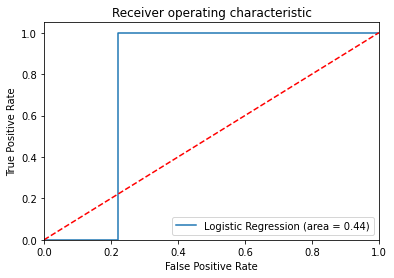

In [ ]:
#Generate ROC curve to show predictive ability of model to distinguish between classes
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Interpretation: Dotted line represents the ROC curve of a purely random classifier, where a good classifier stays far away from the dotted line approaching 1.0 (toward top-left corner). The plot is the true positive rate against the false positive rate, showing the tradeoff between sensitivity and specificity.